# Direct Oral Anticoagulant (DOAC) prescribing during COVID-19

In [80]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

### Count of all people on a DOAC by month since January 2019

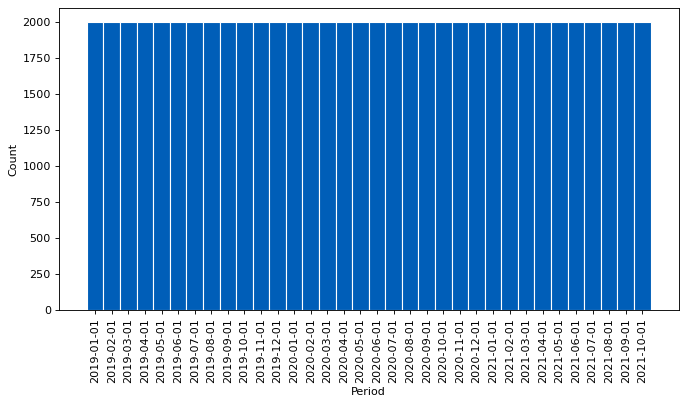

In [81]:
all_df=pd.read_csv("../output/measure_doacs_by_sex.csv", usecols=["date", "on_doac", "population"])
summary_df=all_df.groupby(["date"], as_index=False)["on_doac"].sum()
x1_coordinates=summary_df["date"]
y1_coordinates=summary_df["on_doac"]
plt.figure(figsize=(10,5), dpi=80)
plt.bar(x1_coordinates, y1_coordinates, color='#005EB8', edgecolor='white', width=1)
plt.ylabel('Count')
plt.xlabel('Period')
plt.gca()
plt.xticks(rotation=90)
plt.legend
plt.savefig(f'../output/plot_01_all.png')
plt.show() 

### Plots by demographics

1. Number of people prescribed a DOAC by region

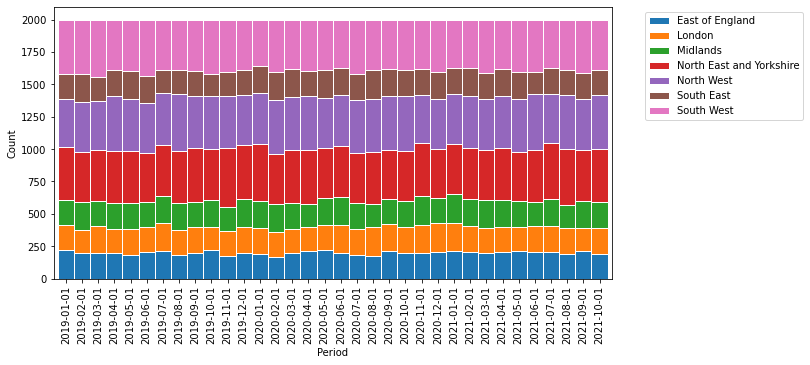

In [82]:
region_df=pd.read_csv("../output/measure_doacs_by_region.csv", usecols=["date", "region", "on_doac", "population"])
region_subset=region_df.loc[region_df["region"] != "missing", :]
pivot_df = region_subset.pivot(index='date', columns='region', values='on_doac')
pivot_df.plot.bar(xlabel='Period', ylabel='Count', stacked='true', edgecolor='white', figsize=(10,5), width=1) 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.savefig(f'../output/plot_02_region.png')
plt.show() 

2. Number of people prescribed a DOAC by age band

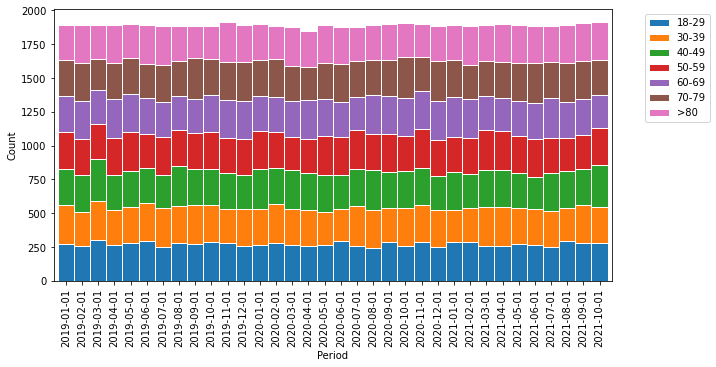

In [83]:
age_df=pd.read_csv("../output/measure_doacs_by_age_band.csv", usecols=["date", "age_band", "on_doac", "population"])
age_subset=age_df.loc[age_df["age_band"] != 'missing', :]
pivot_df = age_subset.pivot(index='date', columns='age_band', values='on_doac')
pivot_df.plot.bar(xlabel='Period', ylabel='Count', stacked='true', edgecolor='white', figsize=(10,5), width=1) 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.savefig(f'../output/plot_03_age.png')
plt.show() 

3. Number of people prescribed a DOAC by sex

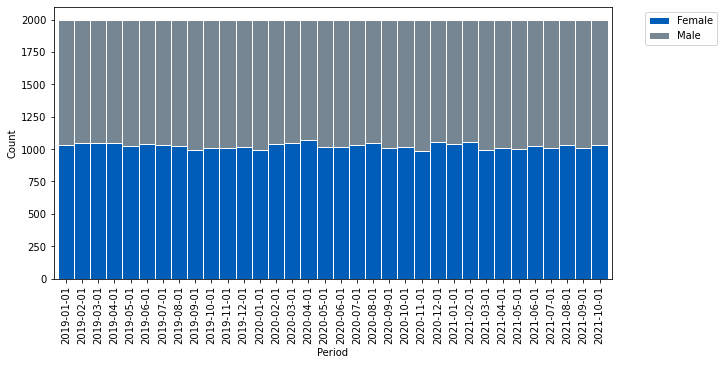

In [84]:
sex_df=pd.read_csv("../output/measure_doacs_by_sex.csv", usecols=["date", "sex", "on_doac", "population"])
#sex_subset=sex_df.loc[region_df["sex"] != "check error code", :]
pivot_df = sex_df.pivot(index='date', columns='sex', values='on_doac')
pivot_df.plot.bar(xlabel='Period', ylabel='Count', stacked='true', color=('#005EB8', '#768692'), edgecolor='white', figsize=(10,5), width=1) 
plt.legend(["Female", "Male"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.savefig(f'../output/plot_04_sex.png')
plt.show() 

4. Number of people prescribed a DOAC identified as a 'caregiver'

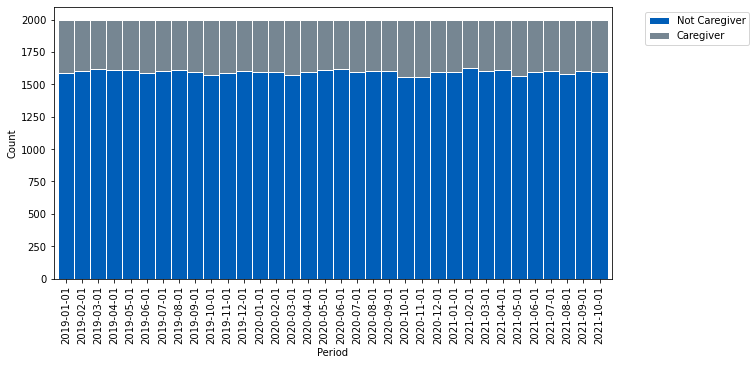

In [85]:
carer_df=pd.read_csv("../output/measure_doacs_by_carer.csv", usecols=["date", "carer", "on_doac", "population"])
pivot_df = carer_df.pivot(index='date', columns='carer', values='on_doac')
pivot_df.plot.bar(xlabel='Period', ylabel='Count', stacked='true', color=('#005EB8', '#768692'), edgecolor='white', figsize=(10,5), width=1) 
plt.legend(["Not Caregiver", "Caregiver"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.savefig(f'../output/plot_05_carer.png')
plt.show() 

### People identified with Atrial Fibrilation as a % of all people prescribed a DOAC

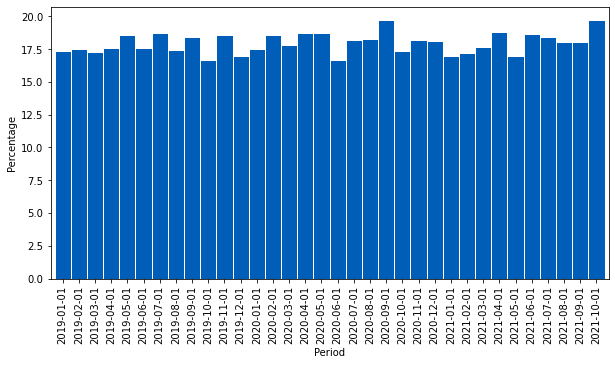

In [130]:
af_df=pd.read_csv("../output/measure_doacs_with_af_recorded.csv", usecols=["date", "atrial_fib", "on_doac", "value"])
af_df['value'] = 100 * af_df['value']
af_subset=af_df.loc[af_df["on_doac"] != 0, :]
pivot_df = af_subset.pivot(index='date', columns='on_doac', values='value')
pivot_df.plot.bar(xlabel='Period', ylabel='Percentage', color=('#005EB8'), edgecolor='white', figsize=(10,5), width=1, legend='') 
plt.gca()
plt.savefig(f'../output/plot_xx_af.png')
plt.show() 